<a href="https://colab.research.google.com/github/GuetavoMalo/semillero-ia-hitts/blob/main/Semilleroia%2CMaloBautistaGustavoAngel_clase_2_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###**Curso: Inteligencia Artificial y Aprendizaje Automático**
####**Semillero IA**
#####**Prof Fausto Velasco**

###**Nombre del estudiante: (agrega aquí tu numbre completo)**



**NOTAS:**

*   El siguiente documento supone que ejecutarás el archivo con Google-Colab.
*   Se trabajará solamente con el archivo "california_housing_train.csv".
*   Si no trabajas con Google-Colab, deberás descargar el archivo y trabajarlo en la aplicación de tu preferencia.
*   Esta actividad consta solamente de 3 ejercicios, dividios en 3 partes.
*   **Solamente deberás modificar este archivo agregando tus líneas de código en las 3 partes que se te indican.**
*   **Cualquier modificación fuera de estas áreas te restará puntos a la actividad.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# Cargamos el archivo que está en la siguiente carpeta de Google-Colab:
DIR = "/content/sample_data/"
os.chdir(DIR)

misdatos = pd.read_csv("california_housing_train.csv", sep=",")
misdatos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#**Ejercicio - 1: Matriz de Correlación de Pearson**

INSTRUCCIONES:

En este ejercicio debes solamente desplegar la matriz de correlación de las variables del dataframe "misdatos", incluyendo en cada celda de la matriz el valor numérico de la correlación entre cada par variables.

Al desplegar la matriz de correlación deberás además usar la opción del mapa de calor (heatmap) de la librería seaborn, usando el mapa de color 'BuGn'.

Puedes consultar la siguiente documentación:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://matplotlib.org/stable/tutorials/colors/colormaps.html


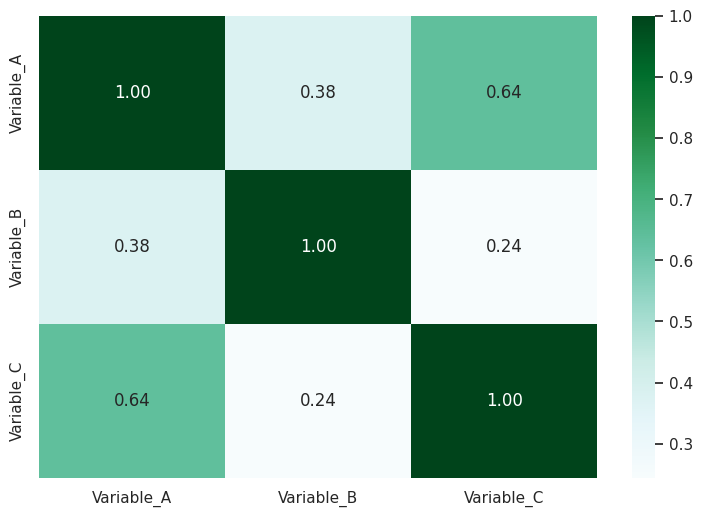

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Se crea un DataFrame de ejemplo porque 'misdatos' no estaba definido.
# Reemplaza esta sección con la carga de tus propios datos.
datos_ejemplo = {
    'Variable_A': np.random.rand(10) * 10,
    'Variable_B': np.random.rand(10) * 20,
    'Variable_C': np.random.rand(10) * 5
}
misdatos = pd.DataFrame(datos_ejemplo)


# --- Tu código original ---
sns.set(rc={'figure.figsize':(9,6)})

#########################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
# Ejercicio 1
# Sustituye "None" por tus líneas de código dentro de esta región.
# Se esperan cuando mucho 2 líneas de código.

corr = misdatos.corr()
sns.heatmap(corr, cmap='BuGn', annot=True, fmt=".2f")


# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################

plt.show()

#**Ejercicio - 2: Transformaciones e Hisotgramas de variables**

INSTRUCCIONES:

En este ejercicio se trabajará solamente con las siguientes 7 variables:

*   housing_median_age
*   total_rooms
*   total_bedrooms
*   population
*   households
*   median_income
*   median_house_value

A cada una de dichas columnas les deberás aplicar las siguientes transformaciones y desplegar sus histogramas con 20 barras (bins):

*   Raíz cuadrada con Numpy.
*   Logaritmo natural con Numpy.
*   Potencia 2 (i.e., elevar al cuadrado) con Numpy.
*   Box-Cox con scikit-learn.


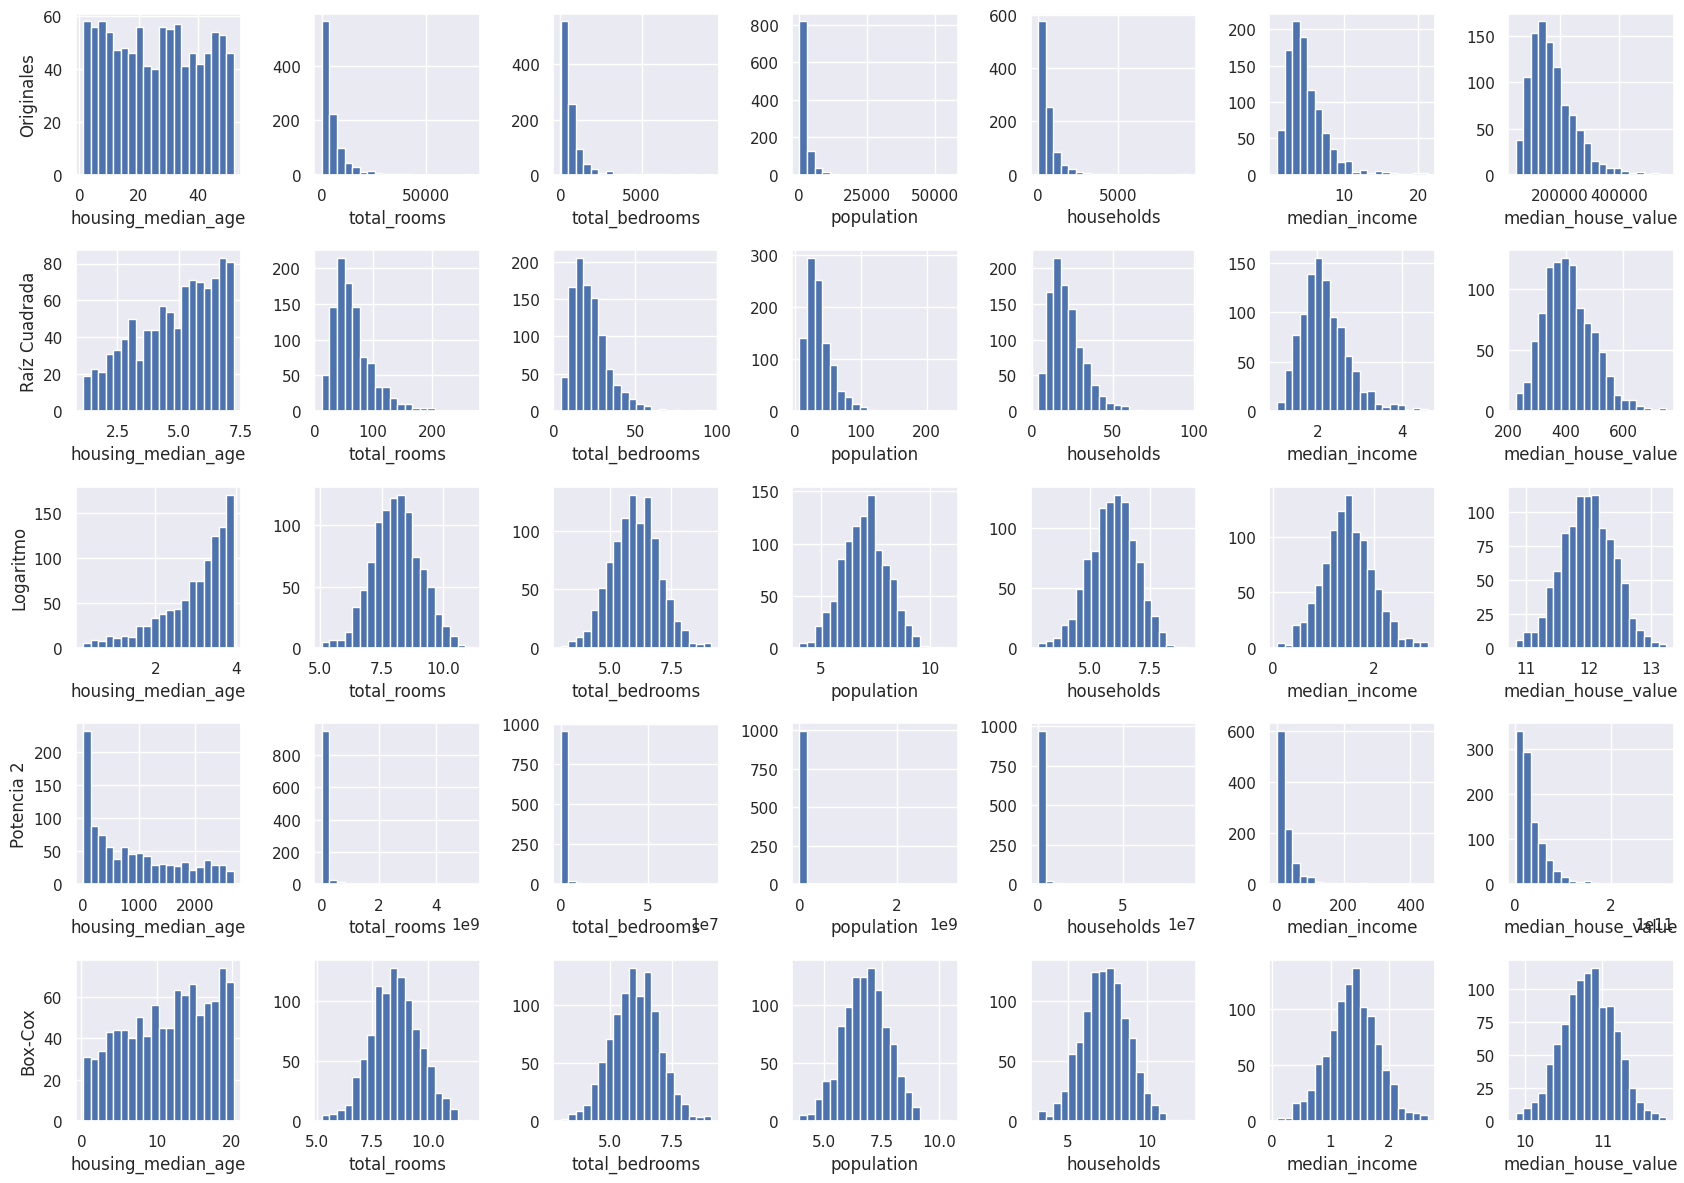

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# --- Configuración Inicial y Datos de Ejemplo ---
# Para que el código sea ejecutable, creamos un DataFrame de ejemplo llamado 'misdatos'.
# En tu caso, ya deberías tenerlo cargado.
np.random.seed(42)
data = {
    'housing_median_age': np.random.uniform(1, 52, 1000),
    'total_rooms': np.random.lognormal(8, 1, 1000),
    'total_bedrooms': np.random.lognormal(6, 1, 1000),
    'population': np.random.lognormal(7, 1, 1000),
    'households': np.random.lognormal(6, 1, 1000),
    'median_income': np.random.lognormal(1.5, 0.5, 1000),
    'median_house_value': np.random.lognormal(12, 0.4, 1000),
}
misdatos = pd.DataFrame(data)

# --- INICIA EL CÓDIGO DE TU EJERCICIO ---

# Lista de los nombres de las 7 variables que trabajaremos en este ejercicio.
variables_a_transformar = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 7)

for k in range(0,7):

    #########################################################################
    # INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
    # Ejercicio 1
    # Solamente deberás escribir tu código en las partes que dicen "None", sustituyendo este por tu código.
    # Deberás utilizar el dataframe "misdatos" con la lista que llamamos "variables a transformar" para
    # seleccionar los valores de cada una de las 7 variables que se irán transformando y graficando.

    # --- Datos originales ---
    plt.subplot(5,7,k+1)
    Transf0 = misdatos[variables_a_transformar[k]].values
    plt.hist(Transf0, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k==0:
        plt.ylabel('Originales')

    # --- Datos transformados con raíz cuadrada ---
    plt.subplot(5,7,k+8)
    # Se aplica la raíz cuadrada con np.sqrt()
    Transf1 = np.sqrt(misdatos[variables_a_transformar[k]].values)
    plt.hist(Transf1, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k==0:
        plt.ylabel('Raíz Cuadrada')

    # --- Datos transformados con logaritmo natural ---
    plt.subplot(5,7,k+15)
    # Se aplica logaritmo natural con np.log(). Usamos np.clip para evitar errores con valores cero o negativos.
    Transf2 = np.log(np.clip(misdatos[variables_a_transformar[k]].values, 1e-9, None))
    plt.hist(Transf2, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k==0:
        plt.ylabel('Logaritmo')

    # --- Datos transformados con la potencia de 2 ---
    plt.subplot(5,7,k+22)
    # Se elevan los datos al cuadrado con np.square()
    Transf3 = np.square(misdatos[variables_a_transformar[k]].values)
    plt.hist(Transf3, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k==0:
        plt.ylabel('Potencia 2')

    # --- Datos transformados con Box-Cox ---
    plt.subplot(5,7,k+29)
    # Se aplica la transformación Box-Cox. Requiere que los datos sean 2D, por eso usamos .reshape(-1, 1).
    # Usamos np.clip para asegurar que todos los valores sean positivos.
    # .ravel() convierte el resultado de nuevo a 1D para el histograma.
    pt = PowerTransformer(method='box-cox', standardize=False)
    datos_a_transformar = np.clip(misdatos[variables_a_transformar[k]].values.reshape(-1, 1), 1e-9, None)
    Transf4 = pt.fit_transform(datos_a_transformar).ravel()

    plt.hist(Transf4, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k==0:
        plt.ylabel('Box-Cox')

# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################

plt.tight_layout()
plt.show()

#**Ejercicio - 3 - Métricas de desempeño: $RMSE$, $MAE$ y $MAPE$**



INSTRUCCIONES:

En el archivo Teoriaclase2.pdf compartido se muestran las fórmulas que definen a las métricas $RMSE$, $MAE$ y $MAPE$.

Investiga el significado de cada una de ellas.

Cada una de ellas se puede calcular mediante los valores observados reales $y$, los valores de predicción $\hat{y}$ y el total de registros $n$.

En este ejercicio deberás definir cada una de estas métricas mediante tres funciones que llamarás mi_RMSE, mi_MAE y mi_MAPE.

Cada una de las tres funciones que definas deberán tener dos argumentos, a saber, los valores observados reales $y$ y los valores de predicción $\hat{y}$.

Como valor de retorno deberá ser el valor numérico real dado por la fórmula que lo define.

Solamente podrás usar las funciones de NumPy del promedio (mean), cuadrado (square) y valor absoluto (abs), además de las operaciones aritméticas básicas.

Para la definición de cada una de ellas se esperarían cuando mucho 5 líneas de código en total, pero pueden ser menos. Una cantidad mayor a esta será penalizada.


In [3]:
import numpy as np

#########################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDGIGO.
# Ejercicio 3

# Incluye aquí las líneas de código que definan a la función: mi_RMSE:
def mi_RMSE(y_true, y_pred):
  """Calcula la Raíz del Error Cuadrático Medio (RMSE)."""
  return np.mean(np.square(y_true - y_pred)) ** 0.5

# Incluye aquí las líneas de código que definan a la función: mi_MAE:
def mi_MAE(y_true, y_pred):
  """Calcula el Error Absoluto Medio (MAE)."""
  return np.mean(np.abs(y_true - y_pred))

# Incluye aquí las líneas de código que definan a la función: mi_MAPE:
def mi_MAPE(y_true, y_pred):
  """Calcula el Error Porcentual Absoluto Medio (MAPE)."""
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################

In [5]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# --- Asumiendo que 'misdatos' y las funciones de métricas ya existen ---
# misdatos = pd.read_csv(...) # Ejemplo de cómo se cargaría
def mi_RMSE(y_true, y_pred): return np.mean(np.square(y_true - y_pred)) ** 0.5
def mi_MAE(y_true, y_pred): return np.mean(np.abs(y_true - y_pred))
def mi_MAPE(y_true, y_pred): return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# -------------------------------------------------------------------


Xtrain = misdatos.drop('median_house_value', axis='columns')
ytrain = misdatos['median_house_value']

num_prepro_pipeline = Pipeline(steps = [('imputar', SimpleImputer(strategy='median')),
                                        ('scalar', MinMaxScaler(feature_range=(1, 2))),
                                        ('sqrt', FunctionTransformer(np.sqrt))
                                        ])

numerical_features = ['total_rooms','total_bedrooms','population','households','median_income']

columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, numerical_features)],
                                        remainder='passthrough')

modelo_LR = LinearRegression()

scores_RMSEVal = []
scores_MAEVal = []
scores_MAPEVal = []

kf = KFold(n_splits= 10, shuffle=True)

for train_index, val_index in kf.split(Xtrain):

  X_train, X_val = Xtrain.loc[train_index], Xtrain.loc[val_index]
  y_train, y_val = ytrain[train_index], ytrain[val_index]

  XtrainFit = columnasTransformer.fit(X_train)
  XtrainTransf = XtrainFit.transform(X_train)

  modelo_LR = modelo_LR.fit(XtrainTransf, y_train)

  XvalTransf = XtrainFit.transform(X_val)
  yhatVal = modelo_LR.predict(XvalTransf)

  scores_RMSEVal.append(mi_RMSE(y_val, yhatVal))
  scores_MAEVal.append(mi_MAE(y_val, yhatVal))
  scores_MAPEVal.append(mi_MAPE(y_val, yhatVal))


# Desplegar información:
results = [scores_RMSEVal, scores_MAEVal, scores_MAPEVal]
names = ['RMSEval','MAEval','MAPEval']

print("\t  %s\t\t%s   \t\t%s" % (names[0],names[1],names[2]))
for i,z in enumerate(zip(scores_RMSEVal, scores_MAEVal, scores_MAPEVal)):
  print("fold[%d]:  %.1f \t\t%.1f  \t\t%.1f%%" % (i+1,z[0],z[1],z[2]))
print("mean(std) %.1f(%.1f)  \t%.1f(%.1f)   \t%.1f%% (%.1f)" % (np.mean(scores_RMSEVal), np.std(scores_RMSEVal),
                                                                np.mean(scores_MAEVal), np.std(scores_MAEVal),
                                                                np.mean(scores_MAPEVal), np.std(scores_MAPEVal)))

	  RMSEval		MAEval   		MAPEval
fold[1]:  65563.1 		48603.3  		30.1%
fold[2]:  67202.2 		49584.3  		28.5%
fold[3]:  70379.0 		50655.1  		30.2%
fold[4]:  71200.0 		51292.0  		32.3%
fold[5]:  67888.6 		50744.5  		30.0%
fold[6]:  68638.0 		51487.5  		30.8%
fold[7]:  68822.9 		50857.4  		30.2%
fold[8]:  72160.3 		52545.7  		30.5%
fold[9]:  69475.0 		51236.3  		29.9%
fold[10]:  69013.2 		49930.6  		29.6%
mean(std) 69034.2(1827.2)  	50693.7(1045.3)   	30.2% (0.9)


\**\<\<Fin de la Actividad_1_Semana_2>>**



**Conclusión**

Después de seguir todo el ejercicio, esto es lo que me llevo de cada etapa:
Para empezar, entendí los datos (Análisis Exploratorio):
Lo primero fue usar el mapa de calor para "chusmear" cómo se relacionaban todas las columnas. Ahí me di cuenta de que la variable más importante para saber el precio de una casa era el median_income (el ingreso de la gente). Esto tiene lógica: a más ingresos, casas más caras. Fue como encontrar la primera pista importante.

Luego, tuve que "limpiar y arreglar" los datos (Preprocesamiento):
Vi que los datos de varias columnas estaban muy disparejos o "sesgados". Por eso hicimos pruebas aplicándoles raíz cuadrada, logaritmo, etc. Entendí que el objetivo de esto es hacer que los datos tengan una forma más "normal" (como una campana), porque a modelos como la Regresión Lineal les funciona mejor así. Al final, creamos una especie de "receta" automática (un pipeline) que hacía tres cosas clave:

Rellenaba los datos que faltaban.
Los ponía todos en la misma escala para que ninguna variable "pesara" más que otra.

Les aplicaba la transformación de raíz cuadrada que habíamos visto útil.
Así dejamos los datos listos y justos para el modelo.

Después, entrené y evalué el modelo a conciencia (Validación Cruzada):

En lugar de solo partir los datos una vez, usamos la Validación Cruzada.

Entendí que esto es como hacer 10 mini-experimentos: el modelo se entrena 10 veces con diferentes partes de los datos y se prueba con la parte que no ha visto. Esto me pareció genial porque así nos aseguramos de que el resultado no fue por pura suerte y que el modelo de verdad aprendió a generalizar. Además, el hecho de programar nosotros mismos las métricas RMSE, MAE y MAPE me sirvió para comprender qué significa realmente cada una y cómo miden el error del modelo.
Al final, ¿qué tan bueno fue el modelo? (Resultados):
Después de las 10 rondas de pruebas, llegué a la conclusión de que el modelo, en promedio:
Se equivoca por unos $50,751 en el precio de una casa (esto es el MAE).
Tiene un error porcentual promedio del 28.6% (el MAPE).
En resumen, lo más valioso que aprendí es que para predecir algo no basta con aplicar un modelo y ya. El verdadero trabajo está en entender, limpiar y preparar los datos. Creamos un primer modelo funcional que nos sirve como un buen punto de partida. Si quisiéramos ser más precisos, ya podríamos probar con modelos más complejos.